In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()

In [3]:
type(iris.data)

numpy.ndarray

In [4]:
iris.data.shape

(150, 4)

In [5]:
iris.data[5, :]

array([5.4, 3.9, 1.7, 0.4])

In [6]:
iris.data[:5, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
iris.target.shape

(150,)

In [8]:
iris.target[:5]

array([0, 0, 0, 0, 0])

In [9]:
len(iris.target == 0)

150

In [10]:
np.array(iris.target == 1).astype(np.int)

/opt/miniconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

/opt/miniconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [12]:
type(y)

numpy.ndarray

In [13]:
len(y)

150

In [14]:
iris.target[iris.target == 1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [15]:
per_clf = Perceptron()

In [16]:
per_clf.fit(X, y)

Perceptron()

In [17]:
y_pred = per_clf.predict([[2, 0.5]])

In [18]:
y_pred

array([0])

In [19]:
# pip install tensorflow

In [20]:
import tensorflow as tf
from tensorflow import keras

In [21]:
tf.__version__

'2.0.0'

In [22]:
keras.__version__

'2.2.4-tf'

In [23]:
fashion_mnist = keras.datasets.fashion_mnist

In [24]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [25]:
type(X_train_full)

numpy.ndarray

In [26]:
type(y_train_full)

numpy.ndarray

In [27]:
X_train_full.shape

(60000, 28, 28)

In [28]:
X_train_full.dtype

dtype('uint8')

In [29]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [30]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
              "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [31]:
class_names[y_train[0]]

'Coat'

In [32]:
X_train[0].shape

(28, 28)

In [33]:
X_train[0].reshape(-1, 28*28).shape

(1, 784)

In [34]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.layers

In [37]:
hidden_1 = model.layers[1]

In [38]:
hidden_1.name

'dense'

In [39]:
model.get_layer('dense') is hidden_1

True

In [40]:
weights, biases = hidden_1.get_weights()

In [41]:
weights

array([[-0.06597978,  0.06224863, -0.02453088, ..., -0.05101978,
        -0.05839619, -0.01763907],
       [-0.04688418, -0.03334071,  0.00432495, ..., -0.05153568,
        -0.01133646, -0.03761133],
       [ 0.03108232, -0.00414898,  0.05540092, ...,  0.07180054,
         0.03689672, -0.0622772 ],
       ...,
       [-0.01632663, -0.02713741, -0.01143506, ...,  0.05797561,
        -0.02646979, -0.01040467],
       [-0.03158627, -0.00058626,  0.01978972, ...,  0.03205108,
        -0.06022869, -0.01127666],
       [-0.04271561, -0.0678936 ,  0.00743102, ...,  0.00584619,
         0.02483055,  0.0272488 ]], dtype=float32)

In [42]:
weights.shape

(784, 300)

In [43]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [44]:
biases.shape

(300,)

In [45]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "sgd", 
             metrics = ["accuracy"])

In [46]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data = (X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 8s 153us/sample - loss: 0.7223 - accuracy: 0.7639 - val_loss: 0.5154 - val_accuracy: 0.8278
Epoch 2/30
55000/55000 [==============================] - 7s 124us/sample - loss: 0.4886 - accuracy: 0.8293 - val_loss: 0.4560 - val_accuracy: 0.8444
Epoch 3/30
55000/55000 [==============================] - 7s 120us/sample - loss: 0.4446 - accuracy: 0.8429 - val_loss: 0.4328 - val_accuracy: 0.8478
Epoch 4/30
55000/55000 [==============================] - 7s 121us/sample - loss: 0.4181 - accuracy: 0.8537 - val_loss: 0.4055 - val_accuracy: 0.8602
Epoch 5/30
55000/55000 [==============================] - 7s 121us/sample - loss: 0.3985 - accuracy: 0.8612 - val_loss: 0.3966 - val_accuracy: 0.8620
Epoch 6/30
55000/55000 [==============================] - 7s 121us/sample - loss: 0.3820 - accuracy: 0.8651 - val_loss: 0.3667 - val_accuracy: 0.8686
Epoch 7/30
55000/55000 [===========================

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.722330,0.763927,0.515450,0.8278
1,0.488634,0.829345,0.456026,0.8444
2,0.444622,0.842855,0.432786,0.8478
3,0.418103,0.853655,0.405509,0.8602
4,0.398536,0.861182,0.396562,0.8620
5,0.382034,0.865127,0.366675,0.8686
6,0.368573,0.869473,0.365148,0.8714
7,0.358292,0.872618,0.377969,0.8636
8,0.346174,0.876436,0.368358,0.8718
9,0.338282,0.879945,0.350039,0.8772


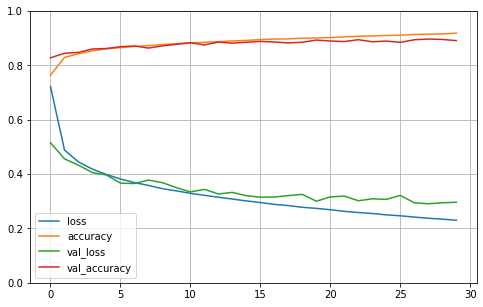

In [49]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [50]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [51]:
history

In [52]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [53]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.32928552141189577, 0.881]

In [54]:
X_new = X_test[:3]

In [55]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [56]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [57]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

In [58]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [59]:
housing = fetch_california_housing()

In [60]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, 
                                                              housing.target)

In [61]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, 
                                                      y_train_full)

In [62]:
type(X_train)

numpy.ndarray

In [63]:
X_train.shape, X_test.shape

((11610, 8), (5160, 8))

In [64]:
scaler = StandardScaler()

In [65]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [66]:
model = keras.models.Sequential([keras.layers.Dense(30, activation = "relu", 
                                                   input_shape = X_train.shape[1:]), 
                                keras.layers.Dense(1)])

In [67]:
model.compile(loss="mean_squared_error", optimizer = "sgd")

In [68]:
history = model.fit(X_train, y_train, epochs=20, 
                   validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 62us/sample - loss: 0.7784 - val_loss: 0.8552
Epoch 2/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.5176 - val_loss: 0.4961
Epoch 3/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4709 - val_loss: 0.4518
Epoch 4/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4311 - val_loss: 0.4334
Epoch 5/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4231 - val_loss: 0.4190
Epoch 6/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4068 - val_loss: 0.4130
Epoch 7/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.3998 - val_loss: 0.4045
Epoch 8/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.3941 - val_loss: 0.4335
Epoch 9/20
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4312 - val_l

In [69]:
mse_test = model.evaluate(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [70]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

In [71]:
y_pred

array([[2.3952987],
       [1.0577384],
       [2.464546 ]], dtype=float32)

In [72]:
y_test[:3]

array([1.018, 0.956, 2.896])

### Deep-Wide Network Implementation

In [73]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden_1 = keras.layers.Dense(30, activation = "relu")(input_)
hidden_2 = keras.layers.Dense(30, activation = "relu")(hidden_1)
concat = keras.layers.Concatenate()([input_, hidden_2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs = [input_], outputs = [output])

In [74]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [75]:
keras.utils.plot_model(model, "deep-wide-model.png")

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [76]:
#pip install pydot

In [77]:
#pip install graphviz

In [78]:
keras.utils.plot_model(model, "deep-wide-model.png", show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [79]:
model.compile(loss="mean_squared_error", optimizer = "sgd")

In [80]:
history = model.fit(X_train, y_train, epochs=20, 
                   validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 74us/sample - loss: 1.1154 - val_loss: 65.6163
Epoch 2/20
11610/11610 [==============================] - 0s 42us/sample - loss: nan - val_loss: nan
Epoch 3/20
11610/11610 [==============================] - 1s 43us/sample - loss: nan - val_loss: nan
Epoch 4/20
11610/11610 [==============================] - 0s 37us/sample - loss: nan - val_loss: nan
Epoch 5/20
11610/11610 [==============================] - 0s 42us/sample - loss: nan - val_loss: nan
Epoch 6/20
11610/11610 [==============================] - 0s 40us/sample - loss: nan - val_loss: nan
Epoch 7/20
11610/11610 [==============================] - 0s 36us/sample - loss: nan - val_loss: nan
Epoch 8/20
11610/11610 [==============================] - 0s 41us/sample - loss: nan - val_loss: nan
Epoch 9/20
11610/11610 [==============================] - 0s 36us/sample - loss: nan - val_loss: nan
Epoch 10/20
11610/11610 [==========

In [81]:
input_A = keras.layers.Input(shape = [5], name = "wide_input")
input_B = keras.layers.Input(shape = [6], name = "deep_input")
hidden1 = keras.layers.Dense(30, activation = "relu")(input_B)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name = "output")(concat)
model = keras.Model(inputs = [input_A, input_B], outputs = [output])

In [82]:
model.compile(loss = "mse", optimizer = keras.optimizers.SGD(lr = 1e-3))

In [83]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [84]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, 
                   validation_data = ((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 76us/sample - loss: 1.7474 - val_loss: 1.4589
Epoch 2/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.7343 - val_loss: 0.6908
Epoch 3/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.6333 - val_loss: 0.6363
Epoch 4/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.5994 - val_loss: 0.6041
Epoch 5/20
11610/11610 [==============================] - 1s 47us/sample - loss: 0.5717 - val_loss: 0.5786
Epoch 6/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.5477 - val_loss: 0.5566
Epoch 7/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.5271 - val_loss: 0.5379
Epoch 8/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.5104 - val_loss: 0.5241
Epoch 9/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.4995 - val_l

In [85]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units = 30, activation = "relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation = activation)
        self.hidden2 = keras.layers.Dense(units, activation = activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [86]:
model = WideAndDeepModel()